# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday September 14th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

Population: All the JORTS  
Sample Frame: 14 Rescues, 35 Temporary houses and 56 Sanctuaries  
Sample: 2 Rescues, 5 temporary houses, and 8 sanctuaries  
Type of Sample: Stratified  
Quantity of Interest: Average monthly food consumption (kilograms per month)  

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [2]:
sample1 = [4.6, 5.0, 6.5, 7.7, 0.0, 4.2, 1.9]
sample1.sort()
print("Sample with y = 0:", sample1)
print("Sample mean:", np.mean(sample1))
print("Sample median:", np.median(sample1))

print()

sample2 = [4.6, 5.0, 6.5, 7.7, 10.0, 4.2, 1.9]
sample2.sort()
print("Sample with y = 10:")
print("Sample mean:", np.mean(sample2))
print("Sample median:", np.median(sample2))


Sample with y = 0: [0.0, 1.9, 4.2, 4.6, 5.0, 6.5, 7.7]
Sample mean: 4.271428571428571
Sample median: 4.6

Sample with y = 10:
Sample mean: 5.7
Sample median: 5.0


**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

In [3]:
s = [1.9, 4.2, 4.6, 5.0, 6.5, 7.7]
length = len(s) + 1
mean10 = 10.0
mean0 = 0.0
summ = sum(s)
y10 = (mean10 * length) - summ
y0 = (mean0 * length) - summ
print("y should be", y10, "for the mean to equal 10.")
print("y should be", y0, "for the mean to equal 0.")

y should be 40.1 for the mean to equal 10.
y should be -29.9 for the mean to equal 0.


**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [4]:
def med(s, y):
    s.append(y)
    s.sort()
    print("The median when y =", y, "is", np.median(s))
    s.remove(y)

s = [1.9, 4.2, 4.6, 5.0, 6.5, 7.7]

med(s, 10)
med(s, 100)
x = float("inf")
med(s, x)
med(s, 5.01)
med(s, 4.99)

The median when y = 10 is 5.0
The median when y = 100 is 5.0
The median when y = inf is 5.0
The median when y = 5.01 is 5.0
The median when y = 4.99 is 4.99


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

- By varying $y$, the sample mean can take any value.
- If $y \geq 5$, then the sample median is $5$. If $y \leq 4.6$, then the sample median is $4.6$. If $4.6 < y < 5.0$, then the sample median is $y$.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

$$\bar{x}_n = \frac{n \bar{x}_{n-1}}{n} + \frac{x_n - \bar{x}_{n-1}}{n}$$

$$\bar{x}_n = \frac{1}{n} \Big( n \bar{x}_{n-1} - \bar{x}_{n-1} + x_n \Big)$$

$$\bar{x}_n = \frac{1}{n} \Big( (n-1) \bar{x}_{n-1} + x_n \Big)$$

$$\bar{x}_n = \frac{1}{n} \Big( (n-1)(\frac{1}{(n-1)} \sum_{k=1}^{n-1} x_k) + x_n \Big)$$

$$\bar{x}_n = \frac{1}{n} \Big( \sum_{k=1}^{n-1} x_k + x_n \Big)$$

$$\bar{x}_n = \frac{1}{n} \sum_{k=1}^{n} x_k $$

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [5]:
def my_sample_mean(a):
    sum = 0
    aLength = len(a)
    for i in range(aLength):
        sum = sum + a[i]
    return (sum / aLength)

def my_sample_var(a):
    mean = my_sample_mean(a)
    var = 0
    aLength = len(a)
    for i in range(aLength):
        var = var + ((a[i] - mean) ** 2)
    return (var / (aLength - 1))
        

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [6]:
octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]
print("The mean is {}".format(my_sample_mean(octopus_suckers)))
print("The variance is {}".format(my_sample_var(octopus_suckers)))

The mean is 21.076923076923077
The variance is 158.91025641025644


**Part D**: Implement a third function called `update_mean` that implements the formula whose validity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

In [7]:
def update_mean(xn, oldMean, n):
#     print("oldMean is", oldMean)
#     print("xn is", xn)
#     print("n is", n)
    return (oldMean + ((xn - oldMean) / n))
    
sucker_means = []
sucker_means.append(octopus_suckers[0])
octo_iter = iter(octopus_suckers)
next(octo_iter)
for i in enumerate(octo_iter, start = 1): # i is a touple (x,y). x is the n element in the list. y is the value at element x
    sucker_means.append(update_mean(i[1], sucker_means[i[0]-1], i[0]+1))
print("The mean for each iteration of the funcition is given by the list: {}".format(sucker_means))

The mean for each iteration of the funcition is given by the list: [25, 27.0, 31.333333333333332, 28.25, 24.0, 21.0, 18.428571428571427, 17.5, 17.666666666666668, 18.0, 18.363636363636363, 20.583333333333332, 21.076923076923077]


### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [3]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Class Warfare:** If class warefare took place, then the data would show that, overall, people who paid more for their tickets surived more than the people who paid less. Similarly, the people who survived would have higher Pclass than the average person on the ship.  
**Male Chivalry:** If male chivalry broke out, the data would show that more women and children survived than men because they were giving up their positions on the life boats.  
These hypothesis are not mutually exclusive. It could be that most of the people on the lifeboats where wealthy women with status, showing that most men gave up their spots but class warefare still occured.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [4]:
#dfTitanic = df.loc[np.isnan(df["Age"]) == False]
#dfTitanic = df.loc[pd.isna(df) == False]
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [10]:
# dfTitanic["Pclass"].value_counts()
class1Population = len(dfTitanic.loc[dfTitanic["Pclass"] == 1])
class2Population = len(dfTitanic.loc[dfTitanic["Pclass"] == 2])
class3Population = len(dfTitanic.loc[dfTitanic["Pclass"] == 3])

class1Survived = len(dfTitanic.loc[(dfTitanic["Pclass"] == 1) & (dfTitanic["Survived"])])
class2Survived = len(dfTitanic.loc[(dfTitanic["Pclass"] == 2) & (dfTitanic["Survived"])])
class3Survived = len(dfTitanic.loc[(dfTitanic["Pclass"] == 3) & (dfTitanic["Survived"])])

class1Proportion = class1Survived / class1Population
class2Proportion = class2Survived / class2Population
class3Proportion = class3Survived / class3Population

print("Of the {} first class passengers, {} survived. That is {:0.4} percent.".format(class1Population, class1Survived, class1Proportion * 100))
print("Of the {} second class passengers, {} survived. That is {:0.4} percent.".format(class2Population, class2Survived, class2Proportion * 100))
print("Of the {} third class passengers, {} survived. That is {:0.4} percent.".format(class3Population, class3Survived, class3Proportion * 100))


Of the 168 first class passengers, 108 survived. That is 64.29 percent.
Of the 145 second class passengers, 70 survived. That is 48.28 percent.
Of the 401 third class passengers, 101 survived. That is 25.19 percent.


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [11]:
totalSurvived = np.sum(dfTitanic["Survived"])
menSurClass1 = np.sum(dfTitanic.loc[(dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 1)]["Survived"])
womenSurClass1 = np.sum(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 1)]["Survived"])
menSurClass2 = np.sum(dfTitanic.loc[(dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 2)]["Survived"])
womenSurClass2 = np.sum(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 2)]["Survived"])
menSurClass3 = np.sum(dfTitanic.loc[(dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 3)]["Survived"])
womenSurClass3 = np.sum(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 3)]["Survived"])

menClass1 = len(dfTitanic.loc[(dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 1)])
menClass2 = len(dfTitanic.loc[(dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 2)])
menClass3 = len(dfTitanic.loc[(dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 3)])
womenClass1 = len(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 1)])
womenClass2 = len(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 2)])
womenClass3 = len(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 3)])

print("There were {} total survivors.".format(totalSurvived))
print("{} men in first class survived. That is {:0.4} percent.".format(menSurClass1, menSurClass1/menClass1 * 100))
print("{} women in first class survived. That is {:0.4} percent.".format(womenSurClass1, womenSurClass1/womenClass1 * 100))
print("{} men in second class survived. That is {:0.4} percent.".format(menSurClass2, menSurClass2/menClass2 * 100))
print("{} women in second class survived. That is {:0.4} percent.".format(womenSurClass2, womenSurClass2/womenClass2 * 100))
print("{} men in third class survived. That is {:0.4} percent.".format(menSurClass3, menSurClass3/menClass3 * 100))
print("{} women in third class survived. That is {:0.4} percent.".format(womenSurClass3, womenSurClass3/womenClass3 * 100))

There were 279 total survivors.
36 men in first class survived. That is 38.71 percent.
72 women in first class survived. That is 96.0 percent.
16 men in second class survived. That is 18.39 percent.
54 women in second class survived. That is 93.1 percent.
39 men in third class survived. That is 13.78 percent.
62 women in third class survived. That is 52.54 percent.


From the numbers above, $62$ women in third class surived while only $36$ men in first class survived. In every class, the number of women that survived was greater than the number of men that survived. In fact, the class with the lowest number of women survivors, second class, still had $15$ more survivors than the men's class with the most survivors, being third class.

**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

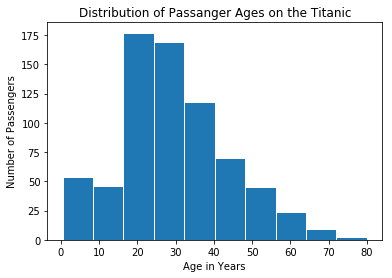

In [12]:
fig,axs = plt.subplots(1,1,figsize = (6,4))
axs.hist(dfTitanic["Age"],
       edgecolor = "white")
axs.set_xlabel("Age in Years")
axs.set_ylabel("Number of Passengers");
axs.set_title("Distribution of Passanger Ages on the Titanic");

From the histogram above, we can see that:
- The data is unimodal because it only has one maximum around the age of $20 \sim 30$.
- The data is not symmetric.
- The data is positively skewed because most of the passengers are concentrated on the left and there is a long tail of passengers on the right.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [13]:
# totalPassengers = dfTitanic["Sex"].value_counts()
womanSurvivedMeanAge = np.mean(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Survived"] == 1)]["Age"])
womanSurvivedMedianAge = np.median(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Survived"] == 1)]["Age"])
womanDiedMeanAge = np.mean(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Survived"] == 0)]["Age"])
womanDiedMedianAge = np.median(dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Survived"] == 0)]["Age"])

print("Of the women who survived, the mean age was {:0.3} and the median was {}.".format(womanSurvivedMeanAge, womanSurvivedMedianAge))
print("Of the women who did not survive, the mean age was {:0.3} and the median was {}.".format(womanDiedMeanAge, womanDiedMedianAge))

Of the women who survived, the mean age was 28.4 and the median was 26.0.
Of the women who did not survive, the mean age was 28.9 and the median was 29.0.


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

The data suggests that male chivalry did occur on the Titanic. This is due to the significant amount of female suriviors in relation to the male survivors. As mentioned above, the class of women with the least survivors (second class with $54$) was greater than the class of men with the most survivors (third class with $39$). The data also suggests that class warfare occured onboard the Titanic because of the proportions of classes that survived. $64.29\%$ of first class passengers survived, whereas second class had $48.28\%$ survive and third class had $25.19\%$ survive. This shows that although the number of people who survived was similar across all three classes, there was still class warfare. There were fewer first and second class passengers, so them having an equal number of survivals shows that they were given higher priority.

### Problem 5 - No arm in another tentacle problem, eh?
***

_Octopuses have eight arms, which are often called tentacles._ 

While technically a fact about the noble octopus, this doesn't really do much for the imagination. Go find another octopus fact that you think is cool *and* that you think no one else is likely to report! In fact, *if your fact is unique, you'll earn extra credit on this problem*! Submit your fact [here](https://docs.google.com/forms/d/e/1FAIpQLScjminsyl9Q1d_OswAXHNLKPj9Gu-00qhVsy07VYDZC8d36LQ/viewform?usp=sf_link).

### Problem 6 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [14]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [15]:
dfBabies = df.loc[(df["bwt"] != 999)&
                  (df["gestation"] != 999)&
                  (df["parity"] != 9)&
                  (df["height"] != 99)&
                  (df["weight"] != 999)&
                  (df["smoke"] != 9)]
dfBabies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

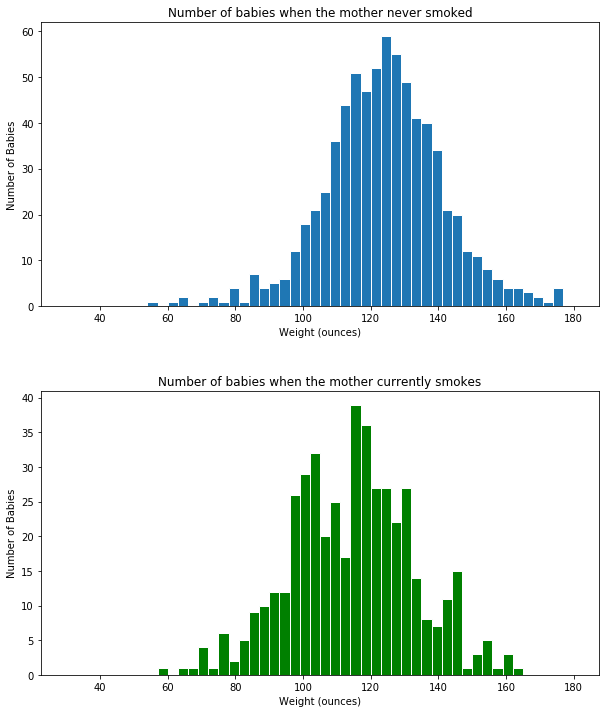

In [16]:
fig,axs = plt.subplots(2,1,figsize = (10,12))
plt.subplots_adjust(hspace = 0.3)

axs[0].hist(dfBabies.loc[dfBabies["smoke"] == 0]["bwt"], # Non-smoker
            edgecolor = "white",
            range = [30, 180],
            bins = 50)
axs[0].set_xlabel("Weight (ounces)")
axs[0].set_ylabel("Number of Babies")
axs[0].set_title("Number of babies when the mother never smoked")

axs[1].hist(dfBabies.loc[dfBabies["smoke"] == 1]["bwt"], #Smoker
            facecolor = "green",
            edgecolor = "white",
            range = [30, 180],
            bins = 50)
axs[1].set_xlabel("Weight (ounces)")
axs[1].set_ylabel("Number of Babies")
axs[1].set_title("Number of babies when the mother currently smokes");



**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

- The histogram of non-smoker babies shows that the data is symmetric and unimodal, with a maximum around the weight of 125.
- The histogram of smoker babies shows that the data is fairly symmetric and bimodal, with maximum values at weights of about 100 and 116.

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [17]:
meanNonSmoker = np.mean(dfBabies.loc[dfBabies["smoke"] == 0]["bwt"])
medianNonSmoker = np.median(dfBabies.loc[dfBabies["smoke"] == 0]["bwt"])
meanSmoker = np.mean(dfBabies.loc[dfBabies["smoke"] == 1]["bwt"])
medianSmoker = np.median(dfBabies.loc[dfBabies["smoke"] == 1]["bwt"])

print("The babies of non-smokers have a mean weight of {:0.5} and median weight of {:0.5}.".format(meanNonSmoker, medianNonSmoker))
print("The babies of smokers have a mean weight of {:0.5} and median of {:0.5}.".format(meanSmoker, medianSmoker))
print("The mean difference between non-smokers and smokers is {:0.3} and the median difference is {:0.4}.".format(meanNonSmoker - meanSmoker, medianNonSmoker - medianSmoker))

The babies of non-smokers have a mean weight of 123.09 and median weight of 123.0.
The babies of smokers have a mean weight of 113.82 and median of 115.0.
The mean difference between non-smokers and smokers is 9.26 and the median difference is 8.0.


The mean is not a good measure of center because of how the data is distributed. The histogram of the babies with smoker mothers shows that the data is bimodal, and the mean falls between those two maximums. The histogram of the babies with non-smoker mothers shows that the data is unimodal. Because of this differnce, the mean is not a good way to commpare the two data sets.

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


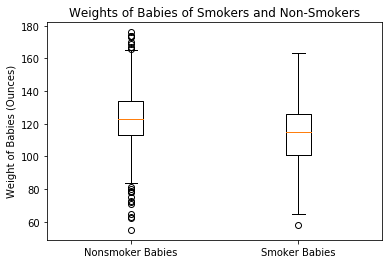

In [18]:
smokers = dfBabies.loc[dfBabies["smoke"] == 1]["bwt"]
nonsmokers = dfBabies.loc[dfBabies["smoke"] == 0]["bwt"]


fig,ax = plt.subplots(1,1,figsize = (6,4))
ax.boxplot([nonsmokers, smokers]);
ax.set_ylabel("Weight of Babies (Ounces)")
ax.set_xticklabels(["Nonsmoker Babies", "Smoker Babies"])
ax.set_title("Weights of Babies of Smokers and Non-Smokers");

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

- The boxplot of the non-smoker babies shows that there is a large spread of data as many data points fall outside the "whiskers" of the plot. The range between $Q_1$ and $Q_3$ is small, between $\sim 115$ and $\sim 130$, showing that half of the data is in the center, which makes sense as the histogram is unimodal.  
- The boxplot of the smoker babies shows that the data is almost entirely contained within the "whiskers," so the data is closer together than the non-smoker data. The IQR of the smoker babies is larger than the nonsmoker IQR because the data is bimodal and has more data further from the median.

### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_ authors Darrell Huff and Irving Geis describe many common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. 